<a href="https://colab.research.google.com/github/lipeng2021/-python1/blob/main/%E5%A4%9A%E5%B1%82%E6%84%9F%E7%9F%A5%E5%99%A8-%E6%9C%80%E7%BB%88%E7%A8%8B%E5%BA%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import torch
from IPython import display
import torch.nn as nn
import sys
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn.init as init
FILENAME = './content/sample_data'

In [6]:
mnist_train = torchvision.datasets.FashionMNIST(root=FILENAME,train=True,transform=transforms.ToTensor(),download=True)
mnist_test = torchvision.datasets.FashionMNIST(root=FILENAME,train=False,transform=transforms.ToTensor(),download=True)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./content/sample_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./content/sample_data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./content/sample_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./content/sample_data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./content/sample_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./content/sample_data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./content/sample_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./content/sample_data/FashionMNIST/raw



In [7]:
def set_svg_figure():
  display.set_matplotlib_formats('svg')

In [8]:
def get_fashion_mnist_labels(labels):
  text_labels=['t-shirt','trouser','pullover','dress','coat','sandal','sneaker','bag','ankle','boot']
  return (text_labels[int(i)]for i in labels)

In [9]:
def show_fashion_mnist(images,labels):
  set_svg_figure()
  _,figures = plt.subplots(1,len(images),figsize=(12,12))
  for f,image,lbl in zip(figures,images,labels):
    f.imshow(image.view(28,28).numpy())
    f.set_title(lbl)
    f.axes.get_xaxis().set_visible(True)
    f.axes.get_yaxis().set_visible(True)
  plt.show()

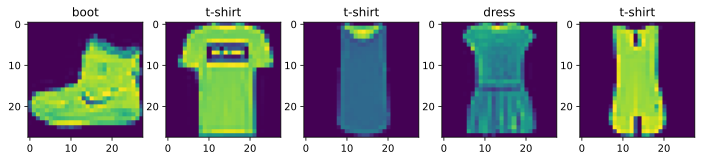

In [10]:
x=[]
y=[]
for i in range(5):
  x.append(mnist_train[i][0])
  y.append(mnist_train[i][1])
show_fashion_mnist(x,get_fashion_mnist_labels(y))

读取数据

In [11]:
batch_size =256
if sys.platform.startswith('win'):
  num_workers = 0
else:
  num_workers = 2
train_iter = torch.utils.data.DataLoader(mnist_train,batch_size,shuffle=True,num_workers=num_workers)
test_iter = torch.utils.data.DataLoader(mnist_train,batch_size,shuffle=True,num_workers=num_workers)

定义函数

In [12]:
num_inputs = 784
num_hiddens = 256
num_outputs = 10
class LinearNet(nn.Module):
  def __init__(self,num_inputs,num_outputs):
    super(LinearNet,self).__init__()
    self.linear = nn.Linear(num_inputs,num_outputs)
  def forwards(self,x):
    y = self.linear(x.view(x.shape[0],-1))
    return y

In [13]:
class FlattenLayer(nn.Module):
  def __init__(self):
    super(FlattenLayer,self).__init__()
  def forward(self,x):
    return x.view(x.shape[0],-1)

In [14]:
from collections import OrderedDict
net = nn.Sequential(
    FlattenLayer(),
    nn.Linear(num_inputs,num_hiddens),
    nn.ReLU(),
    nn.Linear(num_hiddens,num_outputs),
)
for param in net.parameters():
  init.normal_(param,mean=0,std=0.01)

读取数据并进行训练

In [15]:
loss= torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(),lr=0.5)
num_epochs = 5

In [16]:
def sgd(params,batch_size,lr):
  for param in params:
    param.data += lr*param.grad/batch_size

In [17]:
def evaluate_accuracy(data_iter,net):
  acc_sum =0.0
  n = 0 
  for X,y in data_iter:
    acc_sum += (net(X).argmax(dim=1)==y).float().sum().item()
    n += y.shape[0]
  return acc_sum/n

In [20]:
def train_ch4(net,train_iter,test_iter,loss,num_epochs,batch_size,params=None,lr=None,optimizer=None):
  for epoch in range(num_epochs):
    train_loss = 0.0
    train_acc_sum = 0.0
    n = 0
    num =0
    for X,y in train_iter:
      y_hat = net(X)
      l = loss(y_hat,y).sum()

      if optimizer is not None:
        optimizer.zero_grad()
      elif optimizer is not None and params[0].grad is not None:
        for param in params:
          param.grad.zero()
      
      l.backward()
      if optimizer is None:
        sgd(params,batch_size,lr)
      else:
        optimizer.step()
      train_loss += l.item()
      train_acc_sum = (y_hat.argmax(dim=1)==y).float().sum().item()
      n = y.shape[0]
      test_acc_sum = evaluate_accuracy(test_iter,net)
      num+=1
      print('num:%d'%num,end=',')
    print('epoch%d,loss%.4f,trainacc %.3f,test acc %.3f'%(epoch+1,train_loss/n,train_acc_sum/n,test_acc_sum))

In [21]:
train_ch4(net,train_iter,test_iter,loss,num_epochs,batch_size,None,None,optimizer)

num:1,num:2,num:3,num:4,num:5,num:6,num:7,num:8,num:9,num:10,num:11,num:12,num:13,num:14,num:15,num:16,num:17,num:18,num:19,num:20,num:21,num:22,num:23,num:24,num:25,num:26,num:27,num:28,num:29,num:30,num:31,num:32,num:33,num:34,num:35,num:36,num:37,num:38,num:39,num:40,num:41,num:42,num:43,num:44,num:45,num:46,num:47,num:48,num:49,num:50,num:51,num:52,num:53,num:54,num:55,num:56,num:57,num:58,num:59,num:60,num:61,num:62,num:63,num:64,num:65,num:66,num:67,num:68,num:69,num:70,num:71,num:72,num:73,num:74,num:75,num:76,num:77,num:78,num:79,num:80,num:81,num:82,num:83,num:84,num:85,num:86,num:87,num:88,num:89,num:90,num:91,num:92,num:93,num:94,num:95,num:96,num:97,num:98,num:99,num:100,num:101,num:102,num:103,num:104,num:105,num:106,num:107,num:108,num:109,num:110,num:111,num:112,num:113,num:114,num:115,num:116,num:117,num:118,num:119,num:120,num:121,num:122,num:123,num:124,num:125,num:126,num:127,num:128,num:129,num:130,num:131,num:132,num:133,num:134,num:135,num:136,num:137,num:138,num:

In [1]:
for X,y in test_iter:
  true_labels = get_fashion_mnist_labels(y.numpy())
  pred_labels = get_fashion_mnist_labels(net(X).argmax(dim=1).numpy())
titles = [true+'\n'+pred for true,pred in zip(true_labels,pred_labels)]
show_fashion_mnist(X[0:9],title[0:9])

NameError: ignored